In [7]:
import numpy as np
from numpy.linalg import eigh, inv, eigvals, eigh, eig, norm
import matplotlib.pyplot as plt
from tqdm import tqdm

In [32]:
N = 100
N_samples = 50
sigmas = (0.001, 0.5, 1, 2)

# M is a real symmetric orthogonal matrix with M = M.T = M^-1
def generate_M():
    H = np.random.normal(loc=0, scale=1, size=N*N).reshape((N, N))
    M = (H + H.T) / np.sqrt(2*N)
    D, P = eigh(M)
    D = np.diag(np.sign(D))
    M = P @ D @ inv(P)
    return M

# Wigner Matrix NxN, i.e. real symmetric matrix with IID Gaussian random numbers with 
# zero mean and variance sigma^2/N 
def generate_X(sigma):
    H = np.random.normal(loc=0, scale=1, size=N*N).reshape((N, N))
    X = sigma*(H + H.T) / np.sqrt(2*N)
    return X


100%|██████████| 50/50 [00:00<00:00, 159.17it/s]


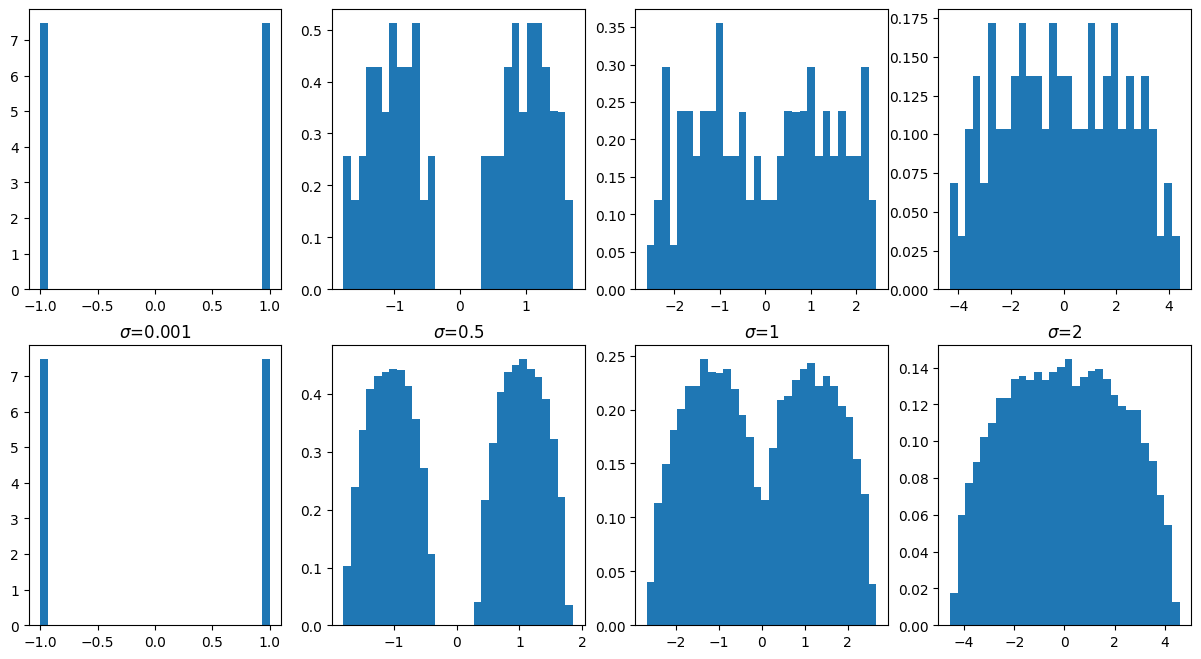

In [36]:
fig, ax = plt.subplots(nrows=2, ncols=len(sigmas), figsize=(15, 8))
for sigma_idx, sigma in enumerate(sigmas):
    M = generate_M()
    eigs_list = []
    for i in tqdm(range(N_samples)):
        X = generate_X(sigma)
        E = M + X
        eigs = eigvals(E)
        if i == 0:
            ax[0, sigma_idx].hist(eigs, density=True, bins=30)
        eigs_list.extend(eigs)
        
    # Plot Eigenvalues of E
    ax[1, sigma_idx].hist(eigs_list, density=True, bins=30)
    ax[1, sigma_idx].set_title(f"$\sigma$={sigma}")

In [51]:
sigma = sigmas[2]
M = generate_M()
X = generate_X(sigma)
E = M + X

In [52]:
eig_vals, eig_vecs = eigh(E)
normalized_eig_vecs = np.apply_along_axis(lambda x: x/norm(x), 
                                          axis=0, 
                                          arr=eig_vecs)

P_plus = 1/2*(M + np.identity(N))
projected_eig_vecs = P_plus @ normalized_eig_vecs

In [53]:
x = np.apply_along_axis(lambda x: norm(x)**2, axis=0, arr=projected_eig_vecs)

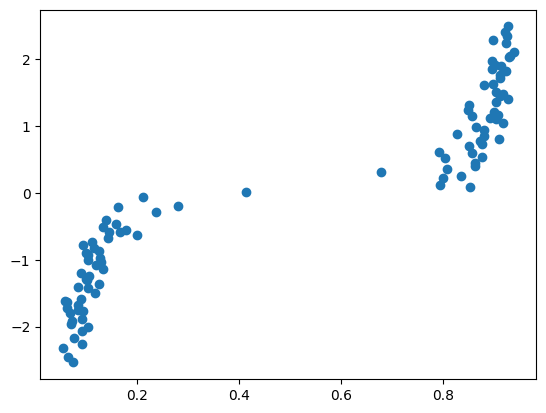

In [54]:

plt.scatter(x, eig_vals)